In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## First-order ODE

We'll use Euler integration to obtain a numerical solution to the following differential equation:
$$
\frac{dy}{dt} = a y(t) + b u(t).
$$

In [28]:
dt = 0.01
t_max = 10
n_timesteps = int(t_max / dt)
t_range = np.linspace(0, t_max, n_timesteps)
u = 1 / (1 + np.exp(-10 * (t_range - t_max / 2)))

a = -1.0
b = 0.5

**Exercise**: Use Euler integration to obtain `y` at each timestep in `t_range`. Assume the initial condition $y(0) = 1$. Make a plot of the result.

<IPython.core.display.Javascript object>


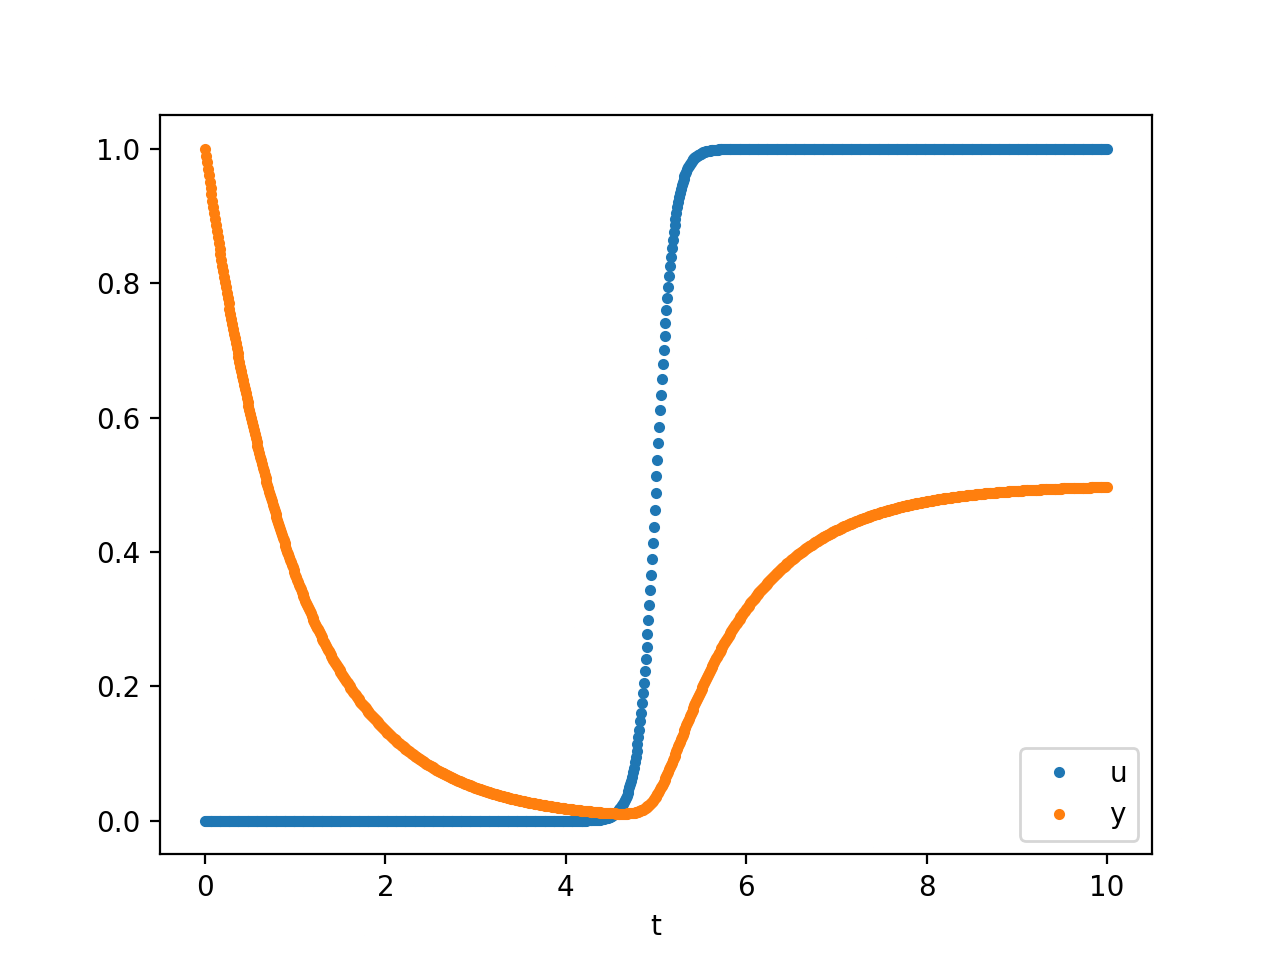

Text(0.5, 0, 't')

In [29]:
## Solution ##

y = np.zeros(n_timesteps)  # initialize the array, to be filled in below
y[0] = 1
for n in range(n_timesteps-1):
    y[n+1] = y[n] + dt * (a * y[n] + b * u[n])
    
plt.plot(t_range, u, '.')
plt.plot(t_range, y, '.')
plt.legend(['u', 'y'])
plt.xlabel('t')

## Second-order ODE

We'll use Euler integration to obtain a numerical solution to the following differential equation:
$$
\frac{d^2y}{dt^2} = a \frac{dy}{dt} + b y + c u(t).
$$
Letting $z = \tfrac{dy}{dt}$, this is equivalent to the following coupled, first-order ODEs:
$$
\begin{cases}
\frac{dy}{dt} = z, \\
\frac{dz}{dt} = a z + b y + c u(t).
\end{cases}
$$

In [30]:
y = np.zeros(n_timesteps)  # initialize the array, to be filled in below
z = np.zeros(n_timesteps)
a = -1.0
b = -0.5
c = 1.0

**Exercise**: Use Euler integration to obtain `y` at each timestep in `t_range`. Assume the initial conditions $y(0) = 1$ and $\dot{y}(0) = 0$. Make a plot of the result.

<IPython.core.display.Javascript object>


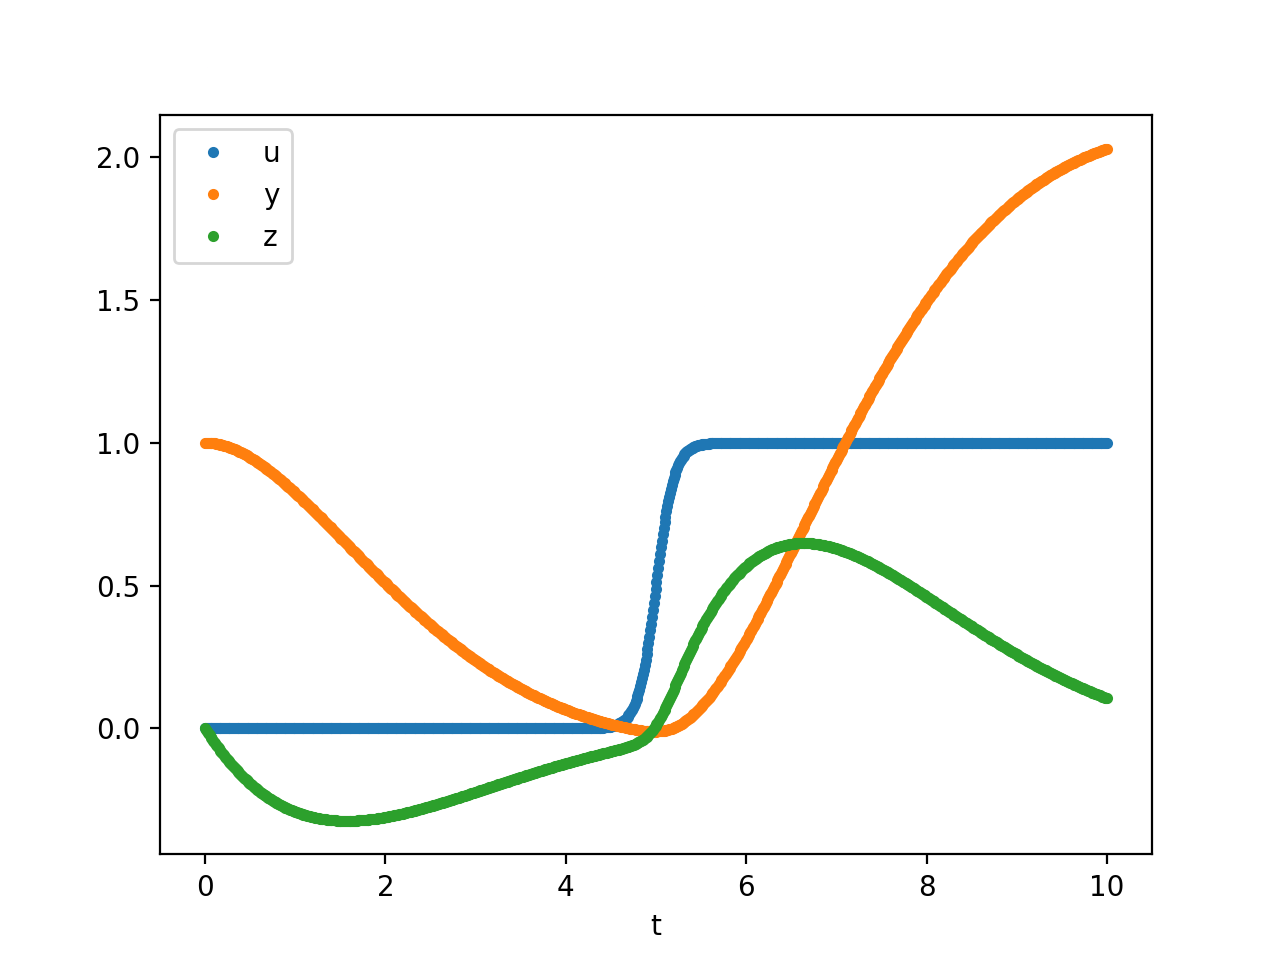

Text(0.5, 0, 't')

In [32]:
## Solution ##

y[0], z[0] = 1, 0
for n in range(n_timesteps-1):
    y[n+1] = y[n] + dt * z[n]
    z[n+1] = z[n] + dt * (a * z[n] + b * y[n] + c * u[n])
    
plt.plot(t_range, u, '.')
plt.plot(t_range, y, '.')
plt.plot(t_range, z, '.')
plt.legend(['u', 'y', 'z'])
plt.xlabel('t')

**Exercise**: For the first-order ODE above, let's make three different solutions with three different choices of the step size `dt` to see how this affects the results.

<IPython.core.display.Javascript object>


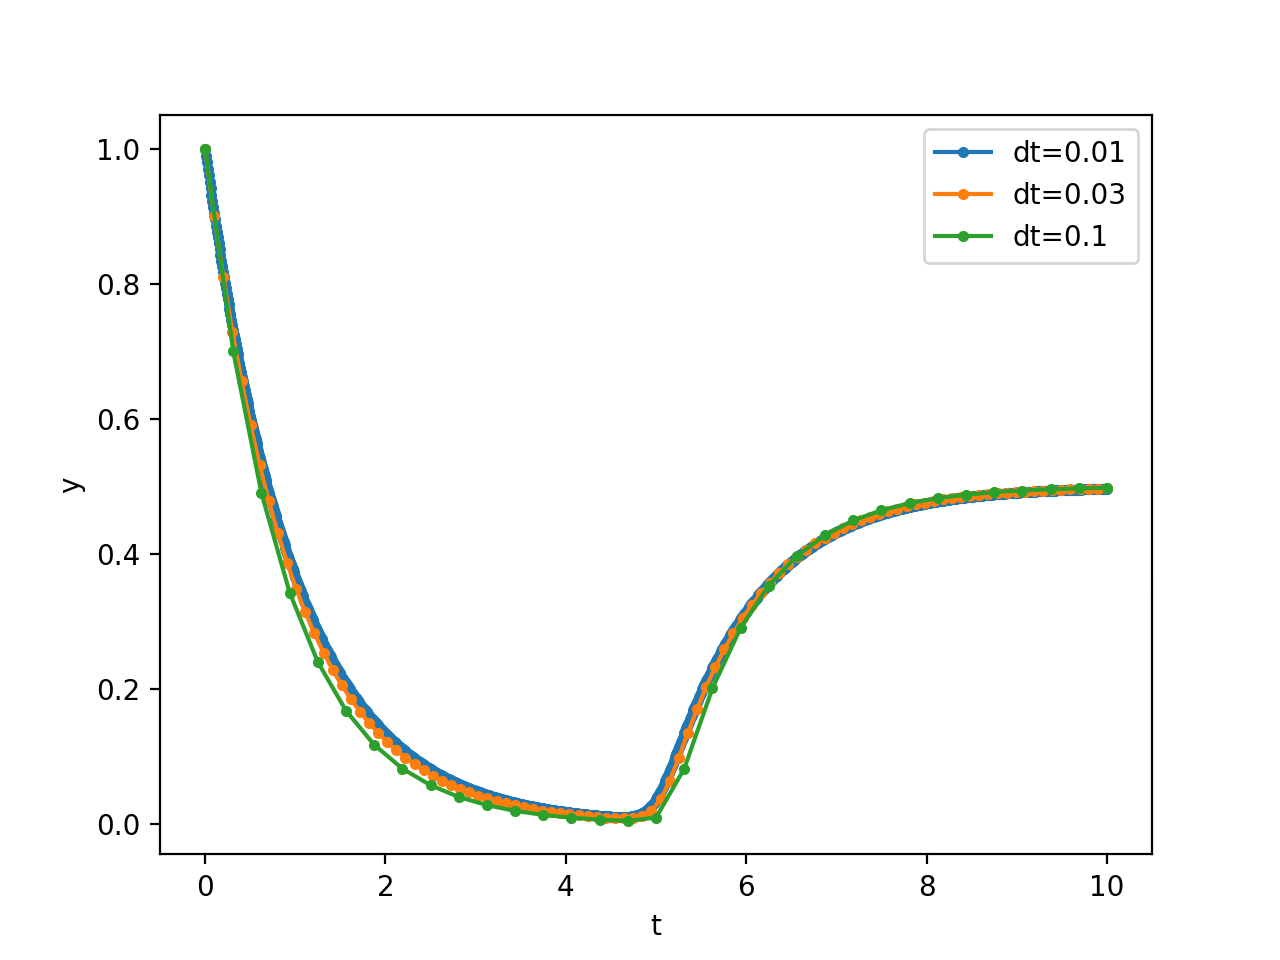

Text(0, 0.5, 'y')

In [36]:
dt_list = [0.01, 0.1, 0.3]

## Solution ##

for dt in dt_list:
    t_max = 10
    n_timesteps = int(t_max / dt)
    t_range = np.linspace(0, t_max, n_timesteps)
    u = 1 / (1 + np.exp(-10 * (t_range - t_max / 2)))

    a = -1.0
    b = 0.5

    y = np.zeros(n_timesteps)  # initialize the array, to be filled in below
    y[0] = 1
    for n in range(n_timesteps-1):
        y[n+1] = y[n] + dt * (a * y[n] + b * u[n])

    plt.plot(t_range, y, '.-')
    
plt.legend(['dt=0.01', 'dt=0.03', 'dt=0.1'])
plt.xlabel('t')
plt.ylabel('y')

## Nonlinear dynamical systems

Euler integration works perfectly well not just for simple, linear systems, but also for complex, high-dimensional systems. Let's show this for a chaotic recurrent neural network, which is a high-dimensional, nonlinear dynamical system described by the following equations:
$$
\frac{dx_i}{dt} = -x_i + \tanh(\sum_{j=1}^N W_{ij} x_j),
$$
where $N \gg 1$, and the parameters $W_{ij}$ are drawn randomly from a Gaussian (i.e. bell-shaped) distribution with mean 0 and variance $g^2 / N$. The $\tanh$ function looks like this:

<IPython.core.display.Javascript object>


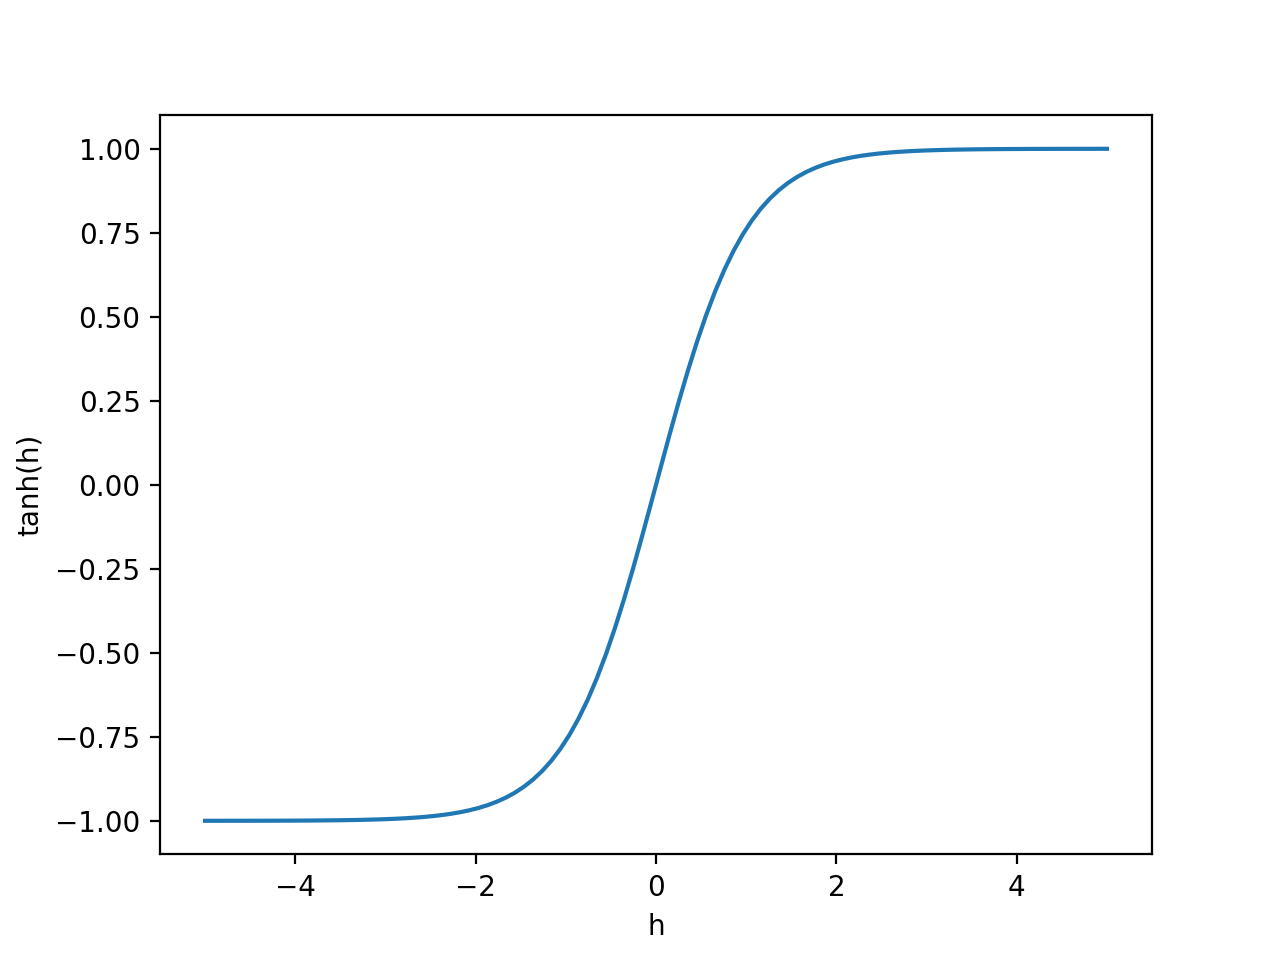

Text(0, 0.5, 'tanh(h)')

In [38]:
plt.plot(np.linspace(-5, 5, 100), np.tanh(np.linspace(-5, 5, 100)))
plt.xlabel('h')
plt.ylabel('tanh(h)')

**Exercise**: Use Euler integration to numerically solve these coupled nonlinear equations, with $N=500$ and with a randomly chosen initial condition. Plot the first few components $x_i(t)$ and see how their behavior differs when $g <1$ vs. when $g > 1$.

<IPython.core.display.Javascript object>


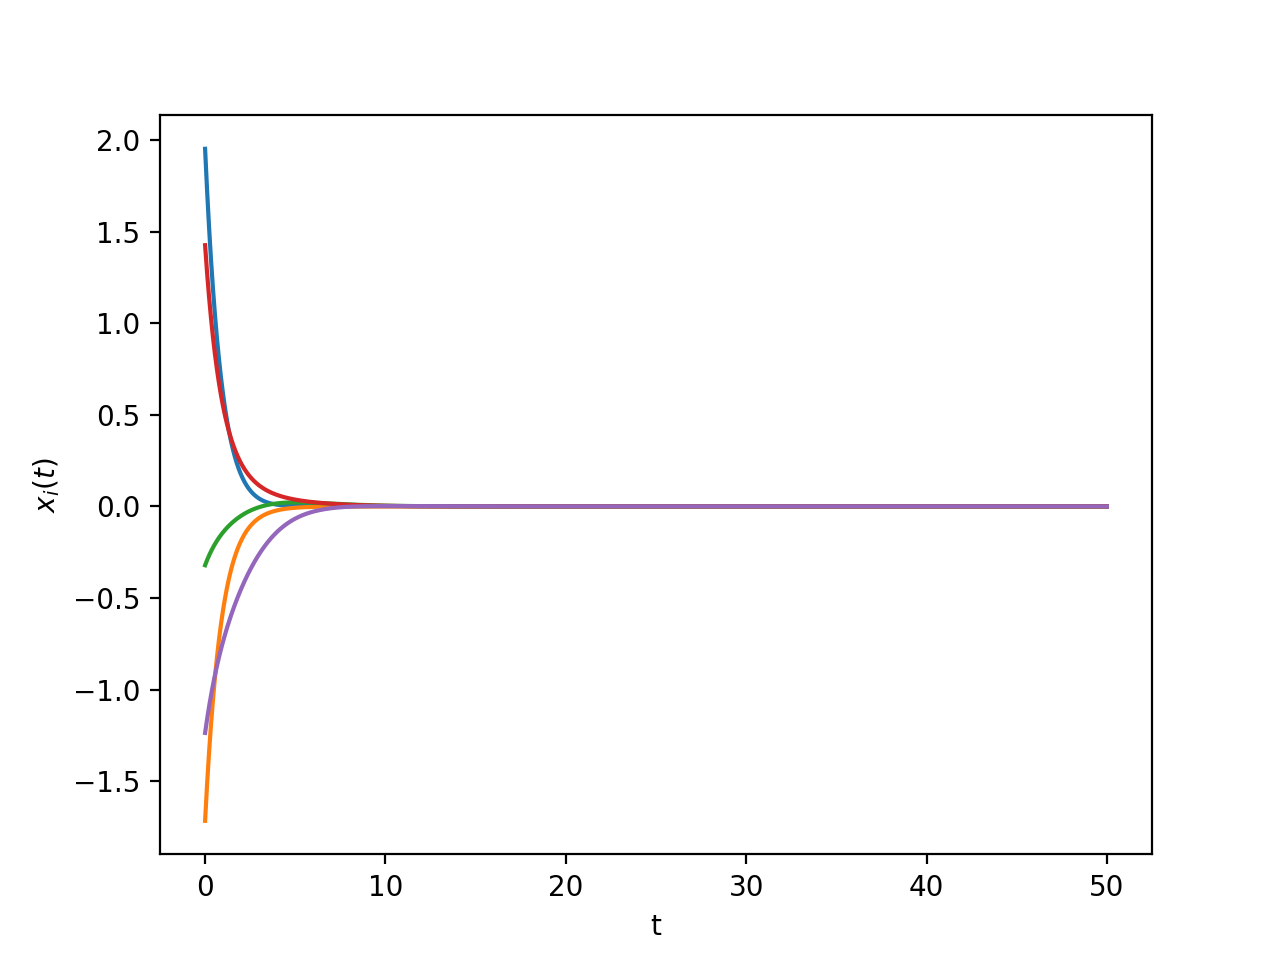

Text(0, 0.5, '$x_i(t)$')

In [46]:
dt = 0.01
t_max = 50
n_timesteps = int(t_max / dt)
t_range = np.linspace(0, t_max, n_timesteps)

g = 0.5
N = 500
w = np.random.randn(N, N) * g / np.sqrt(N)
x = np.zeros((n_timesteps, N))
x[0] = np.random.randn(N)

## Solution ##
for n in range(n_timesteps-1):
    x[n+1,:] = x[n,:] + dt * (-x[n,:] + np.tanh(w @ x[n,:]))
    
plt.plot(t_range, x[:,:5]);
plt.xlabel('t')
plt.ylabel('$x_i(t)$')

## Beyond Euler integration

While Euler integration is the simplest way to solve ODEs numerically, it is not the most efficient or precise. Though it won't be a focus in our course, in practice, one often uses fancier ODE solvers from scientific computing libraries such as `scipy`.

<IPython.core.display.Javascript object>


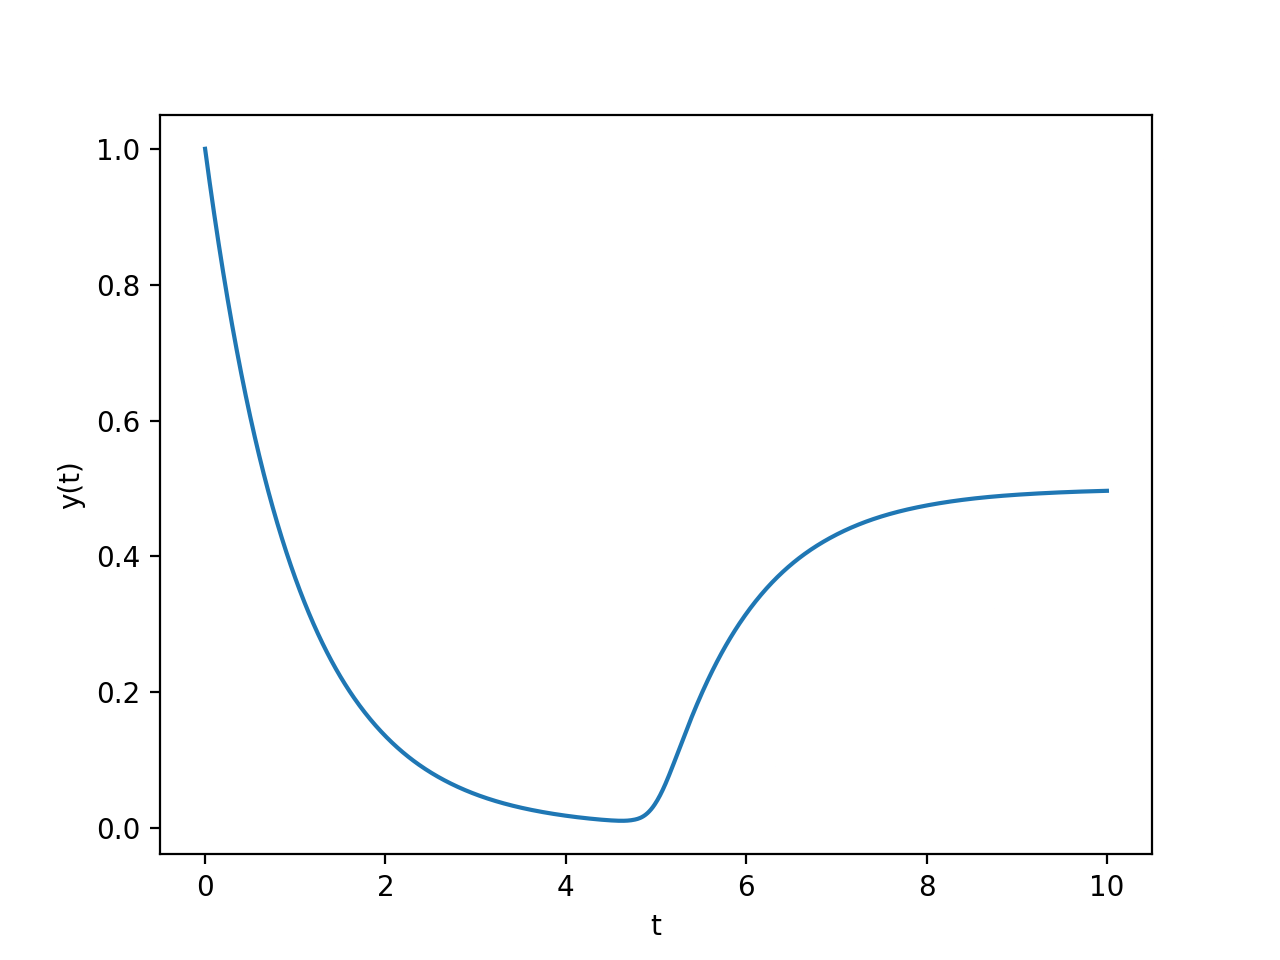

In [59]:
from scipy.integrate import solve_ivp

dt = 0.01
t_max = 10
n_timesteps = int(t_max / dt)
t_range = np.linspace(0, t_max, n_timesteps)
a = -1.0
b = 0.5
y0 = 1  # initial condition

# Define the ODE as a function
def f(t, y):
    u = 1 / (1 + np.exp(-10 * (t - t_max / 2)))
    return a * y + b * u

# Solve the ODE
sol = solve_ivp(f, (0, t_max), [y0], t_eval=t_range)

# Evaluate the solution at the time grid
y = sol.y

# Plot the solution
plt.plot(t_range, y.T)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()
